In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /Users/noahcowan-
[nltk_data]     maccallum/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [9]:
type(all_negative_tweets[0])

str

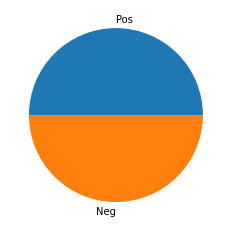

In [11]:
fig = plt.figure()

labels = ['Pos', 'Neg']
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels);

In [20]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@BrandonHerrigan Welcome :), when's your next meet ?
@JamesEllwood0 Aaron said it was shit I didn't have ago because he said not worth taking and that's all I banged on about as well jelouse :(


Preprocessing steps
* Tokenizing the string
* Lowercasing
* REmovnig stop words and punctuation
* Stemming

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/noahcowan-
[nltk_data]     maccallum/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [29]:
# Remove some common substringslike hashtag, retweet marks, and hyperlinks. Do regex on the tweet.
tweet = all_positive_tweets[2277]

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'#', '', tweet2)
tweet2

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i'

In [33]:
# Tokenize the string = split the strings into individual words without blanks or tabs
print(tweet2)

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']


In [35]:
# Remove stop words and punctuation
stopwords_english = stopwords.words('english')

print('stop words')
print(stopwords_english)

print('Punctuation')
print(string.punctuation)

stop words
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [39]:
# Clean up tokenized tweet
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']


In [42]:
# Stemming - convert work to most general form. learn, learning, learned, learnt, stem is learn
# Happy and happiness --> happ. Cannot choose happ because it is the stem of unrelated words like happen
# We use PorterStemmer, but can use other modules

print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []
for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…', 'https://t.co/3tfyom0n1i']


In [46]:
# Combine into single process_tweet() function
from utils import process_tweet

tweet = all_positive_tweets[2277]
print(tweet)
tweets_stem = process_tweet(tweet)
print(tweets_stem)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
